# Processing temperature and precipitation data

The temperature and precipitation data in the Eastern Mediterranean region can be downloaded from the Eastern Mediterranean Climate website.<br/>
<a href="http://emcc.mgm.gov.tr/archive.aspx">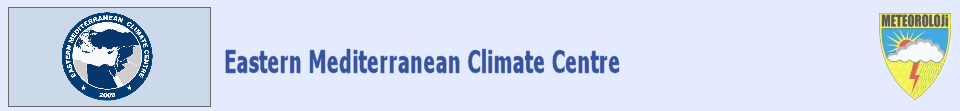

We will be generating simple temperature and precipitation plots for all stations in the Eastern Mediterranean region.

We are now working in a new notebook file and we need to import ```pandas``` for plotting and ```os``` for reading data files. 

In [1]:
import pandas as pd
import os

Let's work with the data from the website and load it using the `pd.read_excel()` method. We need to import os to read the contents of the `MGM` directory and read all excel files. 

In [2]:
filename = "MGM/"+os.listdir('MGM/')[0]
data = pd.read_excel(filename, usecols=['Longitute','Latitute','StationName', 'Year', 'Month', 'Temperature', 'Precipitation'])

for i in range(len(os.listdir('MGM/'))-1):
    filename = "MGM/"+os.listdir('MGM/')[i+1]
    data_add = pd.read_excel(filename, usecols=['Longitute','Latitute','StationName', 'Year', 'Month', 'Temperature', 'Precipitation'])
    frames = [data, data_add]
    data = pd.concat(frames)

We want to examine the dimensions of the data frame by `data.shape` and the head and tail of data using `data.head()` and `data.tail()`.

In [3]:
data.shape

(17156, 7)

In [4]:
data.head()

,Longitute,Latitute,StationName,Temperature,Precipitation,Year,Month
0,26.3,38.3,İZMİR-ÇEŞME,10.616129,155.6,2013.0,1.0
1,26.3,38.3,İZMİR-ÇEŞME,11.703571,135.2,2013.0,2.0
2,26.3,38.3,İZMİR-ÇEŞME,13.790323,48.4,2013.0,3.0
3,26.3,38.3,İZMİR-ÇEŞME,16.426667,42.4,2013.0,4.0
4,26.3,38.3,İZMİR-ÇEŞME,21.016129,26.0,2013.0,5.0


In [5]:
data.tail()

,Longitute,Latitute,StationName,Temperature,Precipitation,Year,Month
96,24.12,35.48,SOUDA (AIRPORT),13.3,161.0,2024.0,12.0
97,22.97,40.52,THESSALONIKI (AIRPORT),8.9,127.0,2024.0,12.0
98,35.58,23.12,SHALATIN,22.9,0.0,2024.0,12.0
99,34.90,32.00,Ben Gurion Int. Airport,15.3,142.0,2024.0,12.0
100,32.82,23.95,Asswan,17.0,0.0,2024.0,12.0


We first reset the index so the row index numbers reflect the shape of the dataframe. Than we should check the data types of `Year` and `Month` columns as we see float variables.

In [6]:
# Reset index
data.reset_index(drop=True)

# Check the numbe of rows and columns of dataframe
data.shape

(17156, 7)

In [7]:
# Check the type of dataframe
type(data)


pandas.core.frame.DataFrame

As this doesn't give information about the types of dataframe columns, we check the column types using `data.dtypes`.

In [8]:
data.dtypes

Longitute        float64
Latitute         float64
StationName       object
Temperature      float64
Precipitation    float64
Year             float64
Month            float64
dtype: object

We should change the data types of Year and Month with integer values. Before doing this, we should also make sure to remove the not available data.

In [9]:
# Fill in the not available data with 0
data["Year"] = data["Year"].fillna(0)
data["Month"] = data["Month"].fillna(0)
data["StationName"] = data["StationName"].fillna(0)

# Change the type of "Year" and "Month" columns from float to integer in the dataframe
data["Year"] = data["Year"].astype(int)
data["Month"] = data["Month"].astype(int)
data["StationName"] = data["StationName"].astype(str)

### Station list

We will be plotting the temperature and precipitation data for all stations. We have to generate the list of all stations and remove the duplications. We import numpy using `import numpy as np` and list the unique station names using `np.unique`.

```
# Import numpy
import numpy as np

# List the station names
data_stations_list = np.unique(data["StationName"].tolist())

# Print the station names
for station in np.unique(data_stations_list):
    print(station)
``` 

In [10]:
import numpy as np

data_stations_list = np.unique(data["StationName"].tolist())

print(data_stations_list)


['0' 'ADANA' 'ADIYAMAN' 'AFYONKARAHİSAR' 'AKCAKOCA' 'AKHİSAR' 'AKSARAY'
 'AKŞEHİR' 'AL ARISH' 'AL HADABA' 'AL JAWF (AIRPORT)' 'AL KHARGAH'
 'AL QURAYYAT' 'AL WAJH (AIRPORT)' 'AL-ARISH' 'ALANYA' 'ALEXANDRIA'
 'AMASRA' 'AMASYA' 'ANAMUR' 'ANKARA' 'ANKARA-POLATLI' 'ANTAKYA' 'ANTALYA'
 'ANTALYA ' 'ANTALYA-ALANYA' 'ANTALYA-ELMALI' 'ANTALYA-FİNİKE'
 'ANTALYA-MANAVGAT' 'ARAPKIR' 'ARDAHAN' 'ARTVİN' 'ARTVİN-HOPA'
 'ASH SHALATIN' 'ASSWAN' 'ASWAN' 'ATHINAI AP HELLINIKON' 'AYDIN' 'AYVALIK'
 'Al-Jawf Domestic Airport' 'Asswan' 'Athinai' 'AĞRI' 'BAHARIA'
 'BALIKESİR' 'BALIKESİR HAVALİMANI' 'BALIKESİR-AYVALIK'
 'BALIKESİR-EDREMİT' 'BANDIRMA' 'BARTIN' 'BARTIN-AMASRA' 'BATMAN'
 'BAYBURT' 'BEER SHEVA CITY' 'BEN-GURION INT. AIRPORT' 'BET DAGAN'
 'BET DAGAN. AIRPORT' 'BET Dagan' 'BET-DAGAN' 'BET-DEGAN' 'BEYŞEHİR'
 'BILECIK' 'BODRUM' 'BOLU' 'BURDUR' 'BURSA' 'Baharia' 'Bandırma Havaalanı'
 'Ben Gurion Int. Airport' 'BİLECİK' 'BİNGÖL' 'BİTLİS' 'CAIRO'
 'CEYLANPINAR' 'CORFU' 'CİHANBEYLİ' 'CİZRE' 'DAHAB' 'DENİZ

In [11]:
# Check the unfamiliar station names
print(data.loc[data['StationName'] == 'S. Valley University'])


    Longitute  Latitute           StationName  Temperature  Precipitation  \
86      32.73      26.2  S. Valley University         33.0            0.0   
87      32.73      26.2  S. Valley University         28.0            0.0   
86      32.73      26.2  S. Valley University         33.6            0.0   
89      32.73      26.2  S. Valley University         27.8            0.0   

    Year  Month  
86  2022      9  
87  2022     10  
86  2024      9  
89  2024     10  


We first have the station name `0` which we want to remove the rows from dataframe with `data = data.loc[data["StationName"] != 0]`. We also have some whitespaces in the numpy array which results in the duplication of some stations such as  `ANTALYA` in the dataframe. Lower and upper cases letters are also considered different and should be combined.

In [14]:
# Delete the rows for station 0
# data_stations_list = np.delete(data_stations_list,0)
data = data.loc[data["StationName"] != "0"]

# Change all lower case station names to upper case
data['StationName'] = data['StationName'].apply(str.upper)

# Correct the station names for continuity
data.loc[(data.StationName == 'NOUZHA'),'StationName'] = 'ALEXANDRIA'
data.loc[(data.StationName == 'İNEBOLU'),'StationName'] = 'KASTAMONU-İNEBOLU'
data.loc[(data.StationName == 'İSKENDERUN'),'StationName'] = 'HATAY-İSKENDERUN'
data.loc[(data.StationName == 'İSLAHİYE'),'StationName'] = 'GAZİANTEP-ISLAHİYE'
data.loc[(data.StationName == 'İSTANBUL-SARIYER'),'StationName'] = 'İSTANBUL-SARIYER (BOĞAZ)'
data.loc[(data.StationName == 'İZMİR BÖLGE'),'StationName'] = 'İZMİR'
data.loc[(data.StationName == 'İZMIR'),'StationName'] = 'İZMİR'
data.loc[(data.StationName == 'ÇEŞME'),'StationName'] = 'İZMİR-ÇEŞME'
data.loc[(data.StationName == 'Ş.KARAHİSAR'),'StationName'] = 'GİRESUN-ŞEBİNKARAHİSAR'
data.loc[(data.StationName == 'ŞİLE'),'StationName'] = 'İSTANBUL-ŞİLE'
data.loc[(data.StationName == 'AKŞEHİR'),'StationName'] = 'KONYA-AKŞEHİR'
data.loc[(data.StationName == 'AKCAKOCA'),'StationName'] = 'DÜZCE-AKÇAKOCA'
data.loc[(data.StationName == 'ALANYA'),'StationName'] = 'ANTALYA-ALANYA'
data.loc[(data.StationName == 'AL-ARISH'),'StationName'] = 'AL ARISH'
data.loc[(data.StationName == 'AL-JAWF DOMESTIC AIRPORT'),'StationName'] = 'AL JAWF (AIRPORT)'
data.loc[(data.StationName == 'AMASRA'),'StationName'] = 'BARTIN-AMASRA'
data.loc[(data.StationName == 'ANAMUR'),'StationName'] = 'MERSİN-ANAMUR'
data.loc[(data.StationName == 'ANTALYA '),'StationName'] = 'ANTALYA'
data.loc[(data.StationName == 'ARAPKIR'),'StationName'] = 'MALATYA-ARAPGİR'
data.loc[(data.StationName == 'ASH SHALATIN'),'StationName'] = 'SHALATIN'
data.loc[(data.StationName == 'ASSWAN'),'StationName'] = 'ASWAN'
data.loc[(data.StationName == 'ATHINAI AP HELLINIKON'),'StationName'] = 'EAST ATTICA'
data.loc[(data.StationName == 'AYVALIK'),'StationName'] = 'BALIKESİR-AYVALIK'
data.loc[(data.StationName == 'BAHARIA'),'StationName'] = 'GIZA'
data.loc[(data.StationName == 'BALIKESİR HAVALİMANI'),'StationName'] = 'BALIKESİR'
data.loc[(data.StationName == 'BANDIRMA HAVAALANI'),'StationName'] = 'BANDIRMA'
data.loc[(data.StationName == 'BEN-GURION INT. AIRPORT'),'StationName'] = 'BEN GURION INT. AIRPORT'
data.loc[(data.StationName == 'BET Dagan'),'StationName'] = 'BET-DAGAN'
data.loc[(data.StationName == 'BET DAGAN. AIRPORT'),'StationName'] = 'BET-DAGAN'
data.loc[(data.StationName == 'BET-DEGAN'),'StationName'] = 'BET-DAGAN'
data.loc[(data.StationName == 'BEYŞEHİR'),'StationName'] = 'KONYA-BEYŞEHİR'
data.loc[(data.StationName == 'BILECIK'),'StationName'] = 'BİLECİK'
data.loc[(data.StationName == 'BURDUR'),'StationName'] = 'ANTALYA-ELMALI'
data.loc[(data.StationName == 'CİHANBEYLİ'),'StationName'] = 'KONYA-CİHANBEYLİ'
data.loc[(data.StationName == 'CİZRE'),'StationName'] = 'ŞIRNAK-CİZRE'
data.loc[(data.StationName == 'CEYLANPINAR'),'StationName'] = 'ŞANLIURFA-CEYLANPINAR'
data.loc[(data.StationName == 'CHANIA'),'StationName'] = 'HERAKLION'
data.loc[(data.StationName == 'DİKİLİ'),'StationName'] = 'İZMİR-DİKİLİ'
data.loc[(data.StationName == 'EDREMİT'),'StationName'] = 'BALIKESİR-EDREMİT'
data.loc[(data.StationName == 'EL ARISH'),'StationName'] = 'AL ARISH'
data.loc[(data.StationName == 'EL FARAFRA'),'StationName'] = 'FARAFRA'
data.loc[(data.StationName == 'ELMALI'),'StationName'] = 'ANTALYA-ELMALI'
data.loc[(data.StationName == 'EMIRDAG'),'StationName'] = 'ESKİŞEHİR-EMİRDAĞ'
data.loc[(data.StationName == 'ERZURUM AIRPORT'),'StationName'] = 'ERZURUM'
data.loc[(data.StationName == 'FİNİKE'),'StationName'] = 'ANTALYA-FİNİKE'
data.loc[(data.StationName == 'FARFARA'),'StationName'] = 'FARAFRA'
data.loc[(data.StationName == 'FETHİYE'),'StationName'] = 'MUĞLA-FETHİYE'
data.loc[(data.StationName == 'FLORYA'),'StationName'] = 'İSTANBUL-FLORYA'
data.loc[(data.StationName == 'GÖKSUN'),'StationName'] = 'KAHRAMANMARAŞ-GÖKSUN'
data.loc[(data.StationName == 'GEMEREK'),'StationName'] = 'SİVAS-GEMEREK'
data.loc[(data.StationName == 'GIZA'),'StationName'] = 'ASWAN'
data.loc[(data.StationName == 'H-4 RWASHED'),'StationName'] = 'RUWAISHED'
data.loc[(data.StationName == 'H4-RWASHED'),'StationName'] = 'RUWAISHED'
data.loc[(data.StationName == 'HELWAN'),'StationName'] = 'ALEXANDRIA'
data.loc[(data.StationName == 'HERAKLION (AIRPORT)'),'StationName'] = 'HERAKLION'
data.loc[(data.StationName == 'HINIS'),'StationName'] = 'ERZURUM-HINIS'
data.loc[(data.StationName == 'HOPA'),'StationName'] = 'ARTVİN-HOPA'
data.loc[(data.StationName == 'HURGUADA'),'StationName'] = 'AL HADABA'
data.loc[(data.StationName == 'JORDAN'),'StationName'] = 'GHOR SAFI'
data.loc[(data.StationName == 'K.MARAŞ'),'StationName'] = 'KAHRAMANMARAŞ'
data.loc[(data.StationName == 'KALAMATA (AIRPORT)'),'StationName'] = 'KALAMATA'
data.loc[(data.StationName == 'KANGAL'),'StationName'] = 'SİVAS-KANGAL'
data.loc[(data.StationName == 'KARABUK'),'StationName'] = 'KARABÜK'
data.loc[(data.StationName == 'KARAPINAR'),'StationName'] = 'KONYA-KARAPINAR'
data.loc[(data.StationName == 'KERKYRA (AIRPORT)'),'StationName'] = 'CORFU'
data.loc[(data.StationName == 'KERKYRA'),'StationName'] = 'CORFU'
data.loc[(data.StationName == 'KHARGA AGRIMET'),'StationName'] = 'AL KHARGAH'
data.loc[(data.StationName == 'KIRKLARELI'),'StationName'] = 'KIRKLARELİ'
data.loc[(data.StationName == 'KUŞADASI'),'StationName'] = 'İZMİR-KUŞADASI'
data.loc[(data.StationName == 'KUMKOY'),'StationName'] = 'İSTANBUL-SARIYER (KARADENİZ)'
data.loc[(data.StationName == 'LARISSA (AIRPORT)'),'StationName'] = 'LARISSA'
data.loc[(data.StationName == 'LARNACA (AIRPORT)'),'StationName'] = 'LARNACA'
data.loc[(data.StationName == 'LARNACA AIRPORT'),'StationName'] = 'LARNACA'
data.loc[(data.StationName == 'LARNAKA'),'StationName'] = 'LARNACA'
data.loc[(data.StationName == 'LULEBURGAZ'),'StationName'] = 'LÜLEBURGAZ'
data.loc[(data.StationName == 'MİNYA'),'StationName'] = 'MINYE'
data.loc[(data.StationName == 'MAAN'),'StationName'] = "MA'AN"
data.loc[(data.StationName == 'MARMARİS'),'StationName'] = 'MUĞLA-MARMARİS'
data.loc[(data.StationName == 'MARSA MATRUH'),'StationName'] = 'MERSA MATROUH'
data.loc[(data.StationName == 'MATRUH'),'StationName'] = 'MERSA MATROUH'
data.loc[(data.StationName == 'MERSA'),'StationName'] = 'MERSA MATROUH'
data.loc[(data.StationName == 'MERSA-MATRUH'),'StationName'] = 'MERSA MATROUH'
data.loc[(data.StationName == 'MILAS'),'StationName'] = 'MUĞLA-MİLAS'
data.loc[(data.StationName == 'MINYA'),'StationName'] = 'TALLAH'
data.loc[(data.StationName == 'POLATLI'),'StationName'] = 'ANKARA-POLATLI'
data.loc[(data.StationName == 'RISHON LEZION'),'StationName'] = 'BET DAGAN'
data.loc[(data.StationName == 'RWASHED'),'StationName'] = 'RUWAISHED'
data.loc[(data.StationName == 'S. VALLEY UNIVERSITY'),'StationName'] = 'QENA'
data.loc[(data.StationName == 'SİLİFKE'),'StationName'] = 'MERSİN-SİLİFKE'
data.loc[(data.StationName == 'SİMAV'),'StationName'] = 'KÜTAHYA-SİMAV'
data.loc[(data.StationName == 'SİVEREK'),'StationName'] = 'ŞANLIURFA-SİVEREK'
data.loc[(data.StationName == 'SİVRİHİSAR'),'StationName'] = 'ESKİŞEHİR-SİVRİHİSAR'
data.loc[(data.StationName == 'SALIHLI'),'StationName'] = 'MANİSA-SALİHLİ'
data.loc[(data.StationName == 'SARIKAMIS'),'StationName'] = 'KARS-SARIKAMIŞ'
data.loc[(data.StationName == 'SHALATİN'),'StationName'] = 'SHALATIN'
data.loc[(data.StationName == 'SIWA'),'StationName'] = 'MERSA MATRUH'
data.loc[(data.StationName == 'THESSALONIKI INTERNATIONAL AIRPORT'),'StationName'] = 'THESSALONIKI (AIRPORT)'
data.loc[(data.StationName == 'TORTUM'),'StationName'] = 'ERZURUM-TORTUM'
data.loc[(data.StationName == 'TSELANIKI'),'StationName'] = 'THESSALONIKI (AIRPORT)'
data.loc[(data.StationName == 'UZUNKOPRU'),'StationName'] = 'EDİRNE-UZUNKÖPRÜ'
data.loc[(data.StationName == 'VAN BÖLGE'),'StationName'] = 'VAN'
data.loc[(data.StationName == 'YÜKSEKOVA'),'StationName'] = 'HAKKARİ-YÜKSEKOVA'
data.loc[(data.StationName == 'ZAKHINTOS'),'StationName'] = 'ZAKYNTHOS'
data.loc[(data.StationName == 'BARTIN-AMASRA'),'StationName'] = 'BARTIN'

# Remove the non-escape blank character from 'HELWAN' station
data['StationName'] = data['StationName'].apply(lambda x: str(x).replace(u'\xa0', u''))

In [15]:
# Check if the station names are corrected
data_stations_list = np.unique(data["StationName"].tolist())

print(data_stations_list)

['ADANA' 'ADIYAMAN' 'AFYONKARAHİSAR' 'AKHİSAR' 'AKSARAY' 'AL ARISH'
 'AL HADABA' 'AL JAWF (AIRPORT)' 'AL KHARGAH' 'AL QURAYYAT'
 'AL WAJH (AIRPORT)' 'ALEXANDRIA' 'AMASYA' 'ANKARA' 'ANKARA-POLATLI'
 'ANTAKYA' 'ANTALYA' 'ANTALYA-ALANYA' 'ANTALYA-ELMALI' 'ANTALYA-FİNİKE'
 'ANTALYA-MANAVGAT' 'ARDAHAN' 'ARTVİN' 'ARTVİN-HOPA' 'ASWAN' 'ATHINAI'
 'AYDIN' 'AĞRI' 'BALIKESİR' 'BALIKESİR-AYVALIK' 'BALIKESİR-EDREMİT'
 'BANDIRMA' 'BARTIN' 'BATMAN' 'BAYBURT' 'BEER SHEVA CITY'
 'BEN GURION INT. AIRPORT' 'BET DAGAN' 'BET-DAGAN' 'BODRUM' 'BOLU' 'BURSA'
 'BİLECİK' 'BİNGÖL' 'BİTLİS' 'CAIRO' 'CORFU' 'DAHAB' 'DENİZLİ' 'DÜZCE'
 'DÜZCE-AKÇAKOCA' 'DİYARBAKIR' 'EAST ATTICA' 'EDİRNE' 'EDİRNE-UZUNKÖPRÜ'
 'EILAT' 'EL HASANA' 'EL-HASAN' 'ELAZIĞ' 'ERZURUM' 'ERZURUM-HINIS'
 'ERZURUM-TORTUM' 'ERZİNCAN' 'ESKİŞEHİR' 'ESKİŞEHİR-EMİRDAĞ'
 'ESKİŞEHİR-SİVRİHİSAR' 'FARAFRA' 'GAZİANTEP' 'GAZİANTEP-ISLAHİYE'
 'GHOR SAFI' 'GÜMÜŞHANE' 'GİRESUN' 'GİRESUN-ŞEBİNKARAHİSAR' 'HAKKARİ'
 'HAKKARİ-YÜKSEKOVA' 'HAR-KNAAN' 'HASHALOM' 'HATAY

### Statistics

#### Temperature

We first group the temperature values for station names and months in the series `temp_mean`. The statistical distribution of temperature values are represented by the first, second and third quantiles stored in the series `temp_quantiles`.

In [16]:
# Store the temperature mean values
temp_mean = data.groupby(["StationName","Year"])["Temperature"].mean()

# Store the temperature quantile values
temp_percentile_tenth = data.groupby(["StationName","Year"])["Temperature"].quantile(0.10)
temp_median = data.groupby(["StationName","Year"])["Temperature"].quantile(0.50)
temp_percentile_ninetieth = data.groupby(["StationName","Year"])["Temperature"].quantile(0.90)

Check the temperature values by looking at the `head` and `tail` values.

In [17]:
temp_mean.head()

StationName  Year
ADANA        2013    19.712782
             2014    19.989725
             2015    18.918251
             2016    20.244874
             2017    19.702228
Name: Temperature, dtype: float64

In [18]:
temp_mean.tail()

StationName   Year
ŞIRNAK-CİZRE  2013    20.018633
              2014    20.653498
              2015    19.555056
              2016    20.412655
              2017    21.808559
Name: Temperature, dtype: float64

In [19]:
temp_percentile_tenth.head()

StationName  Year
ADANA        2013    10.358940
             2014    12.577131
             2015    11.246463
             2016    14.158610
             2017    11.034643
Name: Temperature, dtype: float64

In [20]:
temp_median.head()

StationName  Year
ADANA        2013    19.193172
             2014    20.199355
             2015    17.175000
             2016    18.669355
             2017    18.800000
Name: Temperature, dtype: float64

In [21]:
temp_percentile_ninetieth.head()

StationName  Year
ADANA        2013    28.355946
             2014    28.210366
             2015    28.111452
             2016    29.572742
             2017    29.667247
Name: Temperature, dtype: float64

### Temperature plot
We will plot temperature mean and quantiles for stations with respect to monthly average values. We import pyplot from matplotlib using `import matplotlib.pyplot as plt`. We plot the first 10 stations to conserve computer memory.

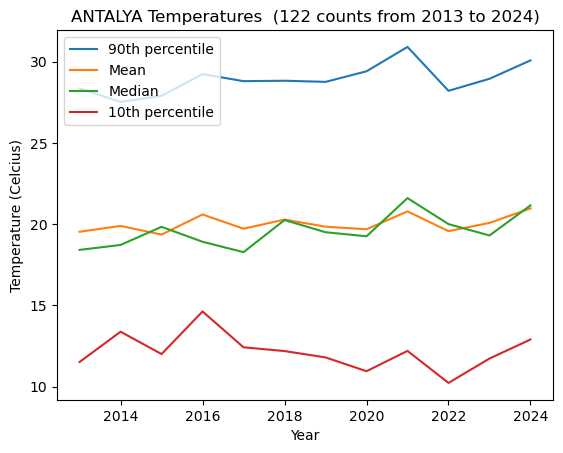

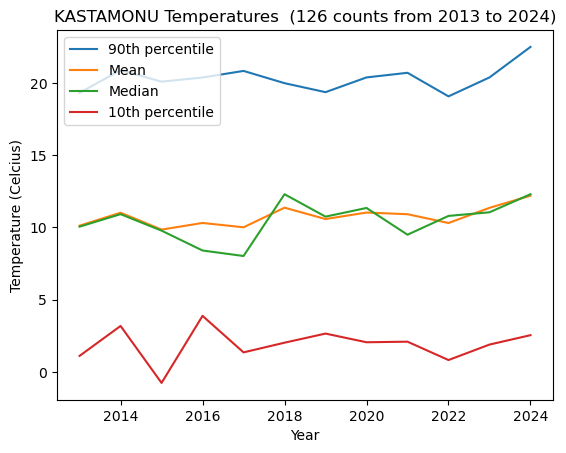

In [33]:
# Import pyplot from matplot library
import matplotlib.pyplot as plt

data_counts = data.groupby(["StationName","Temperature"])["Year"].count()
data_from = data.groupby(["StationName"])["Year"].min()
data_to = data.groupby(["StationName"])["Year"].max()

# Generate temperature plot charts for stations
for st in ("ANTALYA","KASTAMONU"):
    plt.figure()
    plt.xlabel('Year')
    # naming the y axis
    plt.ylabel('Temperature (Celcius)')
    title = st + " " + "Temperatures" + " " + " (" + str(data_counts[st].shape[0]) + " " + "counts from " \
    + str(data_from[st]) + " to " + str(data_to[st]) + ")"
    plt.title(title)
    plt.plot(temp_percentile_ninetieth[st], label="90th percentile")
    plt.plot(temp_mean[st], label="Mean")
    plt.plot(temp_median[st], label="Median")
    plt.plot(temp_percentile_tenth[st], label="10th percentile")
    plt.legend(loc="upper left")

# Print flow charts for each station
plt.show()


We close the plot library to free allocated memory. 

In [23]:
plt.close()

#### Precipitation

We then group the precipitation values for station names and months in the series `ppt_mean`. The statistical distribution of temperature values are represented by the first, second and third quantiles stored in the series `ppt_quantiles`.

In [24]:
# Store the temperature mean values
ppt_mean = data.groupby(["StationName","Year"])["Precipitation"].mean()

# Store the temperature quantile values
ppt_percentile_tenth = data.groupby(["StationName","Year"])["Precipitation"].quantile(0.10)
ppt_median = data.groupby(["StationName","Year"])["Precipitation"].quantile(0.50)
ppt_percentile_ninetieth = data.groupby(["StationName","Year"])["Precipitation"].quantile(0.90)

Check the temperature values by looking at the `head` and `tail` values.

In [25]:
ppt_mean.head()

StationName  Year
ADANA        2013    32.850000
             2014    44.716667
             2015    59.833333
             2016    50.525000
             2017    38.533333
Name: Precipitation, dtype: float64

In [26]:
ppt_mean.tail()

StationName   Year
ŞIRNAK-CİZRE  2013    30.050000
              2014    16.066667
              2015    49.133333
              2016    22.500000
              2017    30.280000
Name: Precipitation, dtype: float64

In [27]:
ppt_percentile_tenth.head()

StationName  Year
ADANA        2013    1.66
             2014    1.60
             2015    1.68
             2016    1.96
             2017    0.06
Name: Precipitation, dtype: float64

In [28]:
ppt_median.head()

StationName  Year
ADANA        2013    39.7
             2014    41.2
             2015    47.0
             2016    40.9
             2017    44.6
Name: Precipitation, dtype: float64

In [29]:
ppt_percentile_ninetieth.head()

StationName  Year
ADANA        2013     54.50
             2014     91.46
             2015    110.06
             2016    100.63
             2017     65.60
Name: Precipitation, dtype: float64

### Precipitation plot
We will plot precipitation mean and quantiles for stations with respect to monthly average values. We import pyplot from matplotlib using `import matplotlib.pyplot as plt`. 

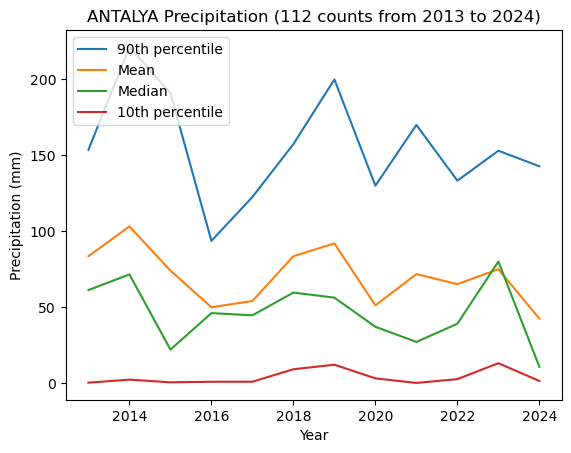

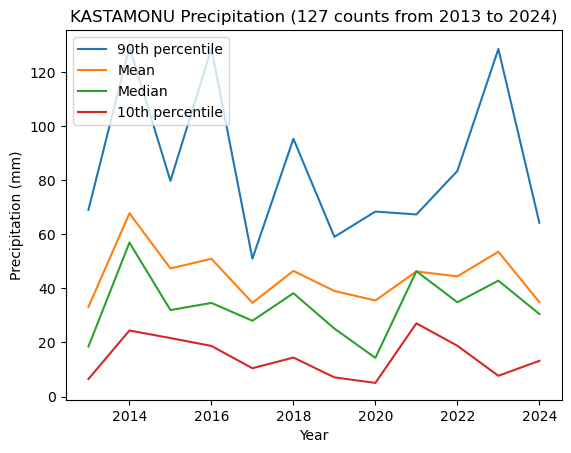

In [34]:
# Import pyplot from matplot library
import matplotlib.pyplot as plt

data_counts = data.groupby(["StationName","Precipitation"])["Year"].count()

# Generate temperature plot charts for stations
for st in ("ANTALYA","KASTAMONU"):
    plt.figure()
    plt.xlabel('Year')
    # naming the y axis
    plt.ylabel('Precipitation (mm)')
    title = st + " " + "Precipitation" + " (" + str(data_counts[st].shape[0]) + " " + "counts from " \
    + str(data_from[st]) + " to " + str(data_to[st]) + ")"
    plt.title(title)
    plt.plot(ppt_percentile_ninetieth[st], label="90th percentile")
    plt.plot(ppt_mean[st], label="Mean")
    plt.plot(ppt_median[st], label="Median")
    plt.plot(ppt_percentile_tenth[st], label="10th percentile")
    plt.legend(loc="upper left")

# Print flow charts for each station
plt.show()

We export the dataframe to Excel file.

In [31]:
data.to_excel('data_export.xlsx', index=False)

We close the plot library to free allocated memory.

In [35]:
plt.close()